In [1]:
import pandas as pd

In [18]:
hardware = '12_proc_30_ram'

In [16]:
hardware = '8_proc_20_ram'

In [8]:
dataToPlot = ['cpuUsage', 'memoryUsage']
folders = ['1h']

In [4]:
tests = ['2_repliki', '4_repliki', '6_replik', '8_replik', '10_replik']

In [21]:
tests = ['transakcje_60s', 'transakcje_120s', 'transakcje_180s', 'transakcje_240s', 'transakcje_300s']

In [22]:
tests = ['zapytania_20ms', 'zapytania_100ms', 'zapytania_500ms', 'zapytania_1000ms', 'zapytania_2000ms']

In [6]:
tests = ['strategia1_200', 'strategia2_200', 'strategia3_200']

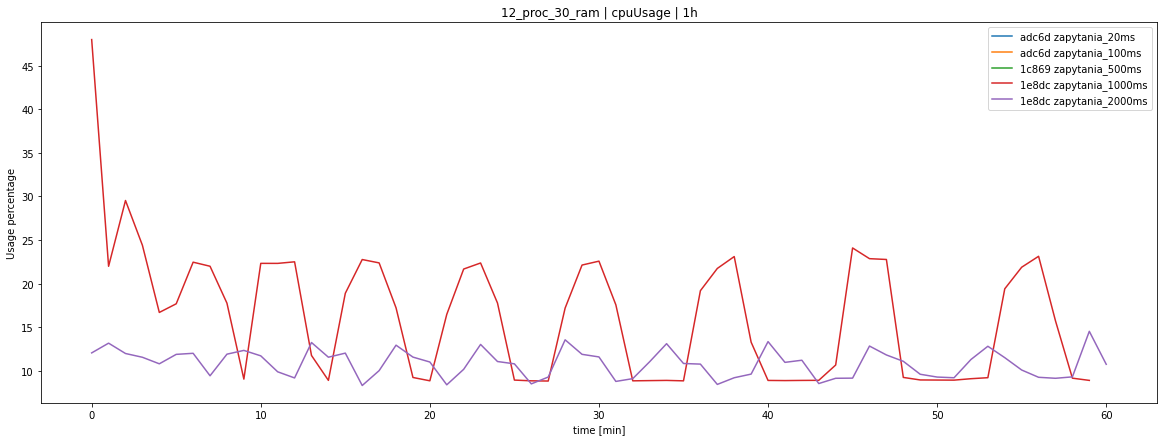

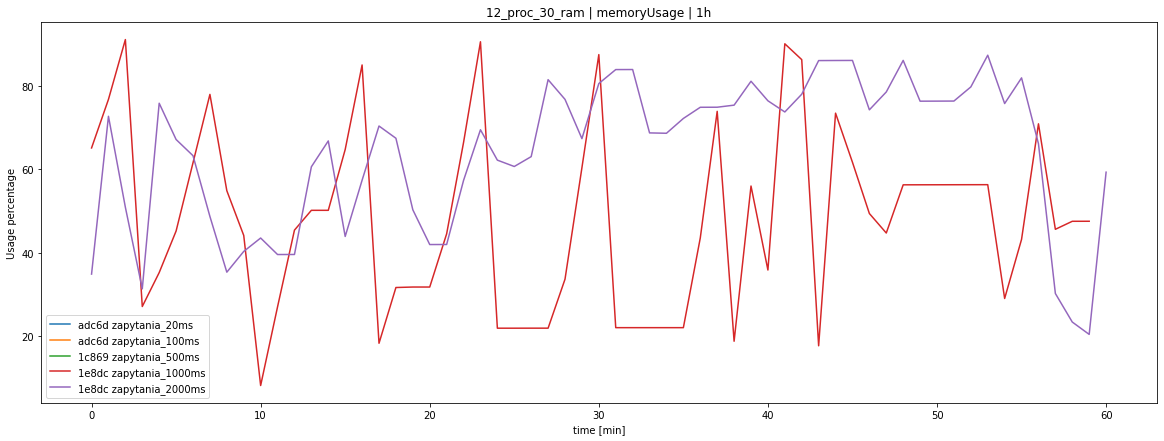

In [23]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                replicas = pd.read_csv('Testy/' + hardware + '/Testy/' + f + '/' + i + '/stock.csv', usecols=['replicaId']).replicaId.unique().tolist()
            except:
                continue
            q = replicas[0][0:5:1]
            try:
                d = pd.read_csv('Testy/' + hardware + '/Testy/' + f + '/' + i + '/stock.csv', usecols=['timestamp', j, 'replicaId'])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['time [min]'] = d['timestamp'].apply(lambda x: (x - t)/60000)
            d[j] = d[j].apply(lambda x: x*100)
            d = d[(d['replicaId'] == r)]
                
            customDataFrame = pd.DataFrame({'time [min]': d['time [min]'], q + ' ' + i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]

            data = pd.concat([data, customDataFrame])
        ax = data.set_index('time [min]').plot(figsize=(20, 7), title = hardware + ' | ' + j + ' | ' + f)
        ax.set_xlabel("time [min]")
        ax.set_ylabel("Usage percentage")